In [7]:
#3.1 Select the data
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SuicideRates").getOrCreate()

suicide_rates_worldwide = spark.read.csv('Suicide Rates Worldwide (2000-2019).csv', header=True, inferSchema=True)
gdp_per_capita_and_suicide_rates = spark.read.csv('GDP per Capita and Suicide rates.csv', header=True, inferSchema=True)
age_standardized_suicide_rates = spark.read.csv('Age-standardized suicide rates.csv', header=True, inferSchema=True)




In [9]:
from pyspark.sql.functions import col

new_column_names = [
    'Country', 'Year',
    'Prob_Dying_BothSexes', 'Prob_Dying_Male', 'Prob_Dying_Female',
    'SuicideRate_BothSexes', 'SuicideRate_Male', 'SuicideRate_Female'
]

for i in range(len(new_column_names)):
    suicide_rates_worldwide = suicide_rates_worldwide.withColumnRenamed(suicide_rates_worldwide.columns[i], new_column_names[i])

suicide_rates_worldwide.show()


+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|    Country|Year|Prob_Dying_BothSexes| Prob_Dying_Male|Prob_Dying_Female|SuicideRate_BothSexes|SuicideRate_Male|SuicideRate_Female|
+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|    Country|Year|          Both sexes|            Male|           Female|           Both sexes|            Male|            Female|
|Afghanistan|2019|    35.3 [21.8-49.8]|34.4 [21.9-47.9]| 36.2 [21.7-51.6]|        4.1 [2.3-7.0]|   4.6 [2.6-7.9]|     3.6 [2.0-5.9]|
|Afghanistan|2018|    35.4 [21.7-50.1]|34.7 [22.0-48.5]| 36.0 [21.4-51.6]|        4.1 [2.3-6.8]|   4.6 [2.6-7.8]|     3.5 [2.0-5.8]|
|Afghanistan|2017|    35.5 [21.7-50.4]|35.0 [22.0-49.1]| 35.9 [21.3-51.7]|        4.1 [2.3-6.8]|   4.6 [2.7-7.9]|     3.4 [2.0-5.7]|
|Afghanistan|2016|    35.6 [21.6-50.7]|35.1 [22.0-49.4]| 36.0 [21.2-5

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id

spark = SparkSession.builder.appName("data_processing").getOrCreate()


Suicide_Rates_Worldwide = spark.read.csv('Suicide Rates Worldwide (2000-2019).csv', header=True, inferSchema=True)
GDP_per_Capita_and_Suicide_rates = spark.read.csv('GDP per Capita and Suicide rates.csv', header=True, inferSchema=True)
Age_standardized_suicide_rates = spark.read.csv('Age-standardized suicide rates.csv', header=True, inferSchema=True)

Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.withColumn("id", monotonically_increasing_id())

Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.filter(Suicide_Rates_Worldwide.id != 0)

new_columns = [
    'Country', 'Year', 
    'Prob_Dying_BothSexes', 'Prob_Dying_Male', 'Prob_Dying_Female', 
    'SuicideRate_BothSexes', 'SuicideRate_Male', 'SuicideRate_Female'
]
Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.drop("id").toDF(*new_columns)

Suicide_Rates_Worldwide.show()


+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|    Country|Year|Prob_Dying_BothSexes| Prob_Dying_Male|Prob_Dying_Female|SuicideRate_BothSexes|SuicideRate_Male|SuicideRate_Female|
+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|Afghanistan|2019|    35.3 [21.8-49.8]|34.4 [21.9-47.9]| 36.2 [21.7-51.6]|        4.1 [2.3-7.0]|   4.6 [2.6-7.9]|     3.6 [2.0-5.9]|
|Afghanistan|2018|    35.4 [21.7-50.1]|34.7 [22.0-48.5]| 36.0 [21.4-51.6]|        4.1 [2.3-6.8]|   4.6 [2.6-7.8]|     3.5 [2.0-5.8]|
|Afghanistan|2017|    35.5 [21.7-50.4]|35.0 [22.0-49.1]| 35.9 [21.3-51.7]|        4.1 [2.3-6.8]|   4.6 [2.7-7.9]|     3.4 [2.0-5.7]|
|Afghanistan|2016|    35.6 [21.6-50.7]|35.1 [22.0-49.4]| 36.0 [21.2-51.9]|        4.0 [2.3-6.7]|   4.4 [2.6-7.4]|     3.6 [2.1-5.9]|
|Afghanistan|2015|    35.6 [21.6-50.8]|35.4 [22.3-49.8]| 35.7 [21.0-5

In [4]:

#3.2 Clean the data
# Display the first few rows of the other datasets to understand their structure
GDP_per_Capita_and_Suicide_rates.show()
Age_standardized_suicide_rates.show()


+--------------------+------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+
|         CountryName|Country Code|GDP_PerCapita_2000 US$|SuicideRate_2000|GDP_PerCapita_2005 US$|SuicideRate_2005|GDP_PerCapita_2010 US$|SuicideRate_2010|GDP_PerCapita_2015 US$|SuicideRate_2015|GDP_PerCapita_2016 US$|SuicideRate_2016|
+--------------------+------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+
|         Afghanistan|         AFG|                  NULL|             5.7|           242.0313792|             6.3|           543.3030419|             5.1|           578.4663529|             4.8|           547.2281102|             4.7|
|              Angola|         AGO|           556.836318

In [5]:
#3.2 Clean the data
from pyspark.sql.functions import col, sum

missing_values = GDP_per_Capita_and_Suicide_rates.select([(sum(col(c).isNull().cast("int"))).alias(c) for c in GDP_per_Capita_and_Suicide_rates.columns])
missing_values.show()


+-----------+------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+
|CountryName|Country Code|GDP_PerCapita_2000 US$|SuicideRate_2000|GDP_PerCapita_2005 US$|SuicideRate_2005|GDP_PerCapita_2010 US$|SuicideRate_2010|GDP_PerCapita_2015 US$|SuicideRate_2015|GDP_PerCapita_2016 US$|SuicideRate_2016|
+-----------+------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+
|          0|           0|                     5|               0|                     2|               0|                     2|               0|                     2|               0|                     2|               0|
+-----------+------------+----------------------+----------------+----------------------+---

In [6]:
#3.2 Clean the data
# Check the data types of each column in the dataset
data_types = GDP_per_Capita_and_Suicide_rates.dtypes
print(data_types)


[('CountryName', 'string'), ('Country Code', 'string'), ('GDP_PerCapita_2000 US$', 'double'), ('SuicideRate_2000', 'double'), ('GDP_PerCapita_2005 US$', 'double'), ('SuicideRate_2005', 'double'), ('GDP_PerCapita_2010 US$', 'double'), ('SuicideRate_2010', 'double'), ('GDP_PerCapita_2015 US$', 'double'), ('SuicideRate_2015', 'double'), ('GDP_PerCapita_2016 US$', 'double'), ('SuicideRate_2016', 'double')]


In [7]:
#3.2 Clean the data
from pyspark.sql.functions import col

new_column_names = [
    'CountryName', 'CountryCode', 
    'GDP_2000', 'SuicideRate_2000', 
    'GDP_2005', 'SuicideRate_2005', 
    'GDP_2010', 'SuicideRate_2010', 
    'GDP_2015', 'SuicideRate_2015', 
    'GDP_2016', 'SuicideRate_2016'
]
GDP_per_Capita_and_Suicide_rates = GDP_per_Capita_and_Suicide_rates.select([col(old_col).alias(new_col) for old_col, new_col in zip(GDP_per_Capita_and_Suicide_rates.columns, new_column_names)])

GDP_per_Capita_and_Suicide_rates.show()



+--------------------+-----------+-----------+----------------+-----------+----------------+-----------+----------------+-----------+----------------+-----------+----------------+
|         CountryName|CountryCode|   GDP_2000|SuicideRate_2000|   GDP_2005|SuicideRate_2005|   GDP_2010|SuicideRate_2010|   GDP_2015|SuicideRate_2015|   GDP_2016|SuicideRate_2016|
+--------------------+-----------+-----------+----------------+-----------+----------------+-----------+----------------+-----------+----------------+-----------+----------------+
|         Afghanistan|        AFG|       NULL|             5.7|242.0313792|             6.3|543.3030419|             5.1|578.4663529|             4.8|547.2281102|             4.7|
|              Angola|        AGO|556.8363181|             7.9|1902.422346|             7.2|3587.883798|             5.7|4166.979684|             5.0|3506.072885|             4.7|
|             Albania|        ALB|1126.683318|             5.5|2673.787283|             6.7|4094.358

In [8]:
#3.2 Clean the data
from pyspark.sql.window import Window

window_spec_ffill = Window.orderBy("CountryName").rowsBetween(-1, 0)
window_spec_bfill = Window.orderBy("CountryName").rowsBetween(0, 1)

for column in GDP_per_Capita_and_Suicide_rates.columns:
    GDP_per_Capita_and_Suicide_rates = GDP_per_Capita_and_Suicide_rates.withColumn(column, when(col(column).isNotNull(), col(column)).otherwise(last(col(column), ignorenulls=True).over(window_spec_ffill)))
    GDP_per_Capita_and_Suicide_rates = GDP_per_Capita_and_Suicide_rates.withColumn(column, when(col(column).isNotNull(), col(column)).otherwise(first(col(column), ignorenulls=True).over(window_spec_bfill)))


final_missing_values_check = GDP_per_Capita_and_Suicide_rates.select([(sum(col(c).isNull().cast("int"))).alias(c) for c in GDP_per_Capita_and_Suicide_rates.columns])


In [9]:
age_standardized_suicide_rates_data = spark.read.csv('Age-standardized suicide rates.csv', header=True, inferSchema=True)

age_standardized_missing_values = age_standardized_suicide_rates_data.select([(sum(col(c).isNull().cast("int"))).alias(c) for c in age_standardized_suicide_rates_data.columns])

age_standardized_data_types = age_standardized_suicide_rates_data.dtypes

final_missing_values_check.show(), age_standardized_missing_values.show(), age_standardized_data_types

+-----------+-----------+--------+----------------+--------+----------------+--------+----------------+--------+----------------+--------+----------------+
|CountryName|CountryCode|GDP_2000|SuicideRate_2000|GDP_2005|SuicideRate_2005|GDP_2010|SuicideRate_2010|GDP_2015|SuicideRate_2015|GDP_2016|SuicideRate_2016|
+-----------+-----------+--------+----------------+--------+----------------+--------+----------------+--------+----------------+--------+----------------+
|          0|          0|       0|               0|       0|               0|       0|               0|       0|               0|       0|               0|
+-----------+-----------+--------+----------------+--------+----------------+--------+----------------+--------+----------------+--------+----------------+

+-------+---+----+----+----+----+
|Country|Sex|2016|2015|2010|2000|
+-------+---+----+----+----+----+
|      0|  0|   0|   0|   0|   0|
+-------+---+----+----+----+----+



(None,
 None,
 [('Country', 'string'),
  ('Sex', 'string'),
  ('2016', 'double'),
  ('2015', 'double'),
  ('2010', 'double'),
  ('2000', 'double')])

In [15]:
# 3.4 Integrate various data sources
from pyspark.sql.functions import array, struct

id_vars = ["Country", "Sex"]

value_vars = array(*[struct(lit(year).alias("Year"), col(year).alias("AgeStandardized_SuicideRate")) for year in ['2000', '2010', '2015', '2016']])

age_standardized_suicide_rates_melted = age_standardized_suicide_rates_data.withColumn("vars", explode(value_vars)).select(id_vars + ["vars.Year", "vars.AgeStandardized_SuicideRate"])

age_standardized_suicide_rates_melted.show()


+-----------+-----------+----+---------------------------+
|    Country|        Sex|Year|AgeStandardized_SuicideRate|
+-----------+-----------+----+---------------------------+
|Afghanistan| Both sexes|2000|                        8.1|
|Afghanistan| Both sexes|2010|                        7.4|
|Afghanistan| Both sexes|2015|                        6.6|
|Afghanistan| Both sexes|2016|                        6.4|
|Afghanistan|       Male|2000|                       14.3|
|Afghanistan|       Male|2010|                       12.5|
|Afghanistan|       Male|2015|                       10.9|
|Afghanistan|       Male|2016|                       10.6|
|Afghanistan|     Female|2000|                        1.7|
|Afghanistan|     Female|2010|                        2.1|
|Afghanistan|     Female|2015|                        2.1|
|Afghanistan|     Female|2016|                        2.1|
|    Albania| Both sexes|2000|                        5.8|
|    Albania| Both sexes|2010|                        7.

In [16]:
# 3.4 Integrate various data sources
gdp_suicide_data=GDP_per_Capita_and_Suicide_rates

In [18]:
# 3.4 Integrate various data sources
from pyspark.sql.functions import expr

value_vars = ['GDP_2000', 'SuicideRate_2000', 'GDP_2005', 'SuicideRate_2005', 
              'GDP_2010', 'SuicideRate_2010', 'GDP_2015', 'SuicideRate_2015', 
              'GDP_2016', 'SuicideRate_2016']

gdp_suicide_data_melted = gdp_suicide_data.selectExpr("CountryName", "CountryCode", 
                                                     "stack(10, 'GDP_2000', GDP_2000, 'SuicideRate_2000', SuicideRate_2000, 'GDP_2005', GDP_2005, 'SuicideRate_2005', SuicideRate_2005, 'GDP_2010', GDP_2010, 'SuicideRate_2010', SuicideRate_2010, 'GDP_2015', GDP_2015, 'SuicideRate_2015', SuicideRate_2015, 'GDP_2016', GDP_2016, 'SuicideRate_2016', SuicideRate_2016) as (Variable, Value)")

gdp_suicide_data_melted = gdp_suicide_data_melted.withColumn("Year", regexp_extract(col("Variable"), "(\d+)", 1).cast("int"))
gdp_suicide_data_melted = gdp_suicide_data_melted.withColumn("Metric", when(col("Variable").like("GDP%"), "GDP_PerCapita").otherwise("SuicideRate"))

gdp_suicide_data_melted = gdp_suicide_data_melted.drop("Variable")

gdp_suicide_data_pivot = gdp_suicide_data_melted.groupBy("CountryName", "CountryCode", "Year").pivot("Metric").agg(first("Value"))

gdp_suicide_data_pivot.show()


+-----------+-----------+----+-------------+-----------+
|CountryName|CountryCode|Year|GDP_PerCapita|SuicideRate|
+-----------+-----------+----+-------------+-----------+
|Afghanistan|        AFG|2000|  1126.683318|        5.7|
|Afghanistan|        AFG|2005|  242.0313792|        6.3|
|Afghanistan|        AFG|2010|  543.3030419|        5.1|
|Afghanistan|        AFG|2015|  578.4663529|        4.8|
|Afghanistan|        AFG|2016|  547.2281102|        4.7|
|    Albania|        ALB|2000|  1126.683318|        5.5|
|    Albania|        ALB|2005|  2673.787283|        6.7|
|    Albania|        ALB|2010|  4094.358816|        7.8|
|    Albania|        ALB|2015|  3952.830781|        6.0|
|    Albania|        ALB|2016|  4124.108543|        6.3|
|    Algeria|        DZA|2000|  1765.022577|        4.1|
|    Algeria|        DZA|2005|  3113.094651|        3.8|
|    Algeria|        DZA|2010|  4480.785777|        3.3|
|    Algeria|        DZA|2015|  4177.888966|        3.2|
|    Algeria|        DZA|2016| 

In [21]:
Suicide_Rates_Worldwide.show()
suicide_data=Suicide_Rates_Worldwide

+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|    Country|Year|Prob_Dying_BothSexes| Prob_Dying_Male|Prob_Dying_Female|SuicideRate_BothSexes|SuicideRate_Male|SuicideRate_Female|
+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|Afghanistan|2019|    35.3 [21.8-49.8]|34.4 [21.9-47.9]| 36.2 [21.7-51.6]|        4.1 [2.3-7.0]|   4.6 [2.6-7.9]|     3.6 [2.0-5.9]|
|Afghanistan|2018|    35.4 [21.7-50.1]|34.7 [22.0-48.5]| 36.0 [21.4-51.6]|        4.1 [2.3-6.8]|   4.6 [2.6-7.8]|     3.5 [2.0-5.8]|
|Afghanistan|2017|    35.5 [21.7-50.4]|35.0 [22.0-49.1]| 35.9 [21.3-51.7]|        4.1 [2.3-6.8]|   4.6 [2.7-7.9]|     3.4 [2.0-5.7]|
|Afghanistan|2016|    35.6 [21.6-50.7]|35.1 [22.0-49.4]| 36.0 [21.2-51.9]|        4.0 [2.3-6.7]|   4.4 [2.6-7.4]|     3.6 [2.1-5.9]|
|Afghanistan|2015|    35.6 [21.6-50.8]|35.4 [22.3-49.8]| 35.7 [21.0-5

In [24]:
new_column_names = [
    'Country', 'Year', 
    'Prob_Dying_BothSexes', 'Prob_Dying_Male', 'Prob_Dying_Female', 
    'SuicideRate_BothSexes', 'SuicideRate_Male', 'SuicideRate_Female'
]
for old_col, new_col in zip(Suicide_Rates_Worldwide.columns, new_column_names):
    Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.withColumnRenamed(old_col, new_col)

Suicide_Rates_Worldwide.show()



+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|    Country|Year|Prob_Dying_BothSexes| Prob_Dying_Male|Prob_Dying_Female|SuicideRate_BothSexes|SuicideRate_Male|SuicideRate_Female|
+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+
|    Country|Year|          Both sexes|            Male|           Female|           Both sexes|            Male|            Female|
|Afghanistan|2019|    35.3 [21.8-49.8]|34.4 [21.9-47.9]| 36.2 [21.7-51.6]|        4.1 [2.3-7.0]|   4.6 [2.6-7.9]|     3.6 [2.0-5.9]|
|Afghanistan|2018|    35.4 [21.7-50.1]|34.7 [22.0-48.5]| 36.0 [21.4-51.6]|        4.1 [2.3-6.8]|   4.6 [2.6-7.8]|     3.5 [2.0-5.8]|
|Afghanistan|2017|    35.5 [21.7-50.4]|35.0 [22.0-49.1]| 35.9 [21.3-51.7]|        4.1 [2.3-6.8]|   4.6 [2.7-7.9]|     3.4 [2.0-5.7]|
|Afghanistan|2016|    35.6 [21.6-50.7]|35.1 [22.0-49.4]| 36.0 [21.2-5

In [25]:
from pyspark.sql.functions import split, regexp_extract

def split_value_interval(df, column_name):
    value = regexp_extract(df[column_name], r'([\d.]+)', 1).alias(f"{column_name}_Value")
    interval = split(regexp_extract(df[column_name], r'\[([\d.-]+)\]', 1), "-")
    lower = interval.getItem(0).alias(f"{column_name}_Lower")
    upper = interval.getItem(1).alias(f"{column_name}_Upper")
    return [value, lower, upper]

new_columns = []
for column_name in ['Prob_Dying_BothSexes', 'Prob_Dying_Male', 'Prob_Dying_Female', 'SuicideRate_BothSexes', 'SuicideRate_Male', 'SuicideRate_Female']:
    new_columns.extend(split_value_interval(Suicide_Rates_Worldwide, column_name))

Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.select(*Suicide_Rates_Worldwide.columns, *new_columns)

float_columns = [
    col_name for col_name in Suicide_Rates_Worldwide.columns if "Value" in col_name or "Lower" in col_name or "Upper" in col_name
]
for col_name in float_columns:
    Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.withColumn(col_name, col(col_name).cast("float"))

Suicide_Rates_Worldwide = Suicide_Rates_Worldwide.withColumn("Year", col("Year").cast("int"))

Suicide_Rates_Worldwide.show()


+-----------+----+--------------------+----------------+-----------------+---------------------+----------------+------------------+--------------------------+--------------------------+--------------------------+---------------------+---------------------+---------------------+-----------------------+-----------------------+-----------------------+---------------------------+---------------------------+---------------------------+----------------------+----------------------+----------------------+------------------------+------------------------+------------------------+
|    Country|Year|Prob_Dying_BothSexes| Prob_Dying_Male|Prob_Dying_Female|SuicideRate_BothSexes|SuicideRate_Male|SuicideRate_Female|Prob_Dying_BothSexes_Value|Prob_Dying_BothSexes_Lower|Prob_Dying_BothSexes_Upper|Prob_Dying_Male_Value|Prob_Dying_Male_Lower|Prob_Dying_Male_Upper|Prob_Dying_Female_Value|Prob_Dying_Female_Lower|Prob_Dying_Female_Upper|SuicideRate_BothSexes_Value|SuicideRate_BothSexes_Lower|SuicideRate_B

In [28]:
from pyspark.sql.functions import array, col, explode, lit

columns_to_melt = ['GDP_2000', 'SuicideRate_2000', 'GDP_2005', 'SuicideRate_2005', 
                   'GDP_2010', 'SuicideRate_2010', 'GDP_2015', 'SuicideRate_2015', 
                   'GDP_2016', 'SuicideRate_2016']

cols = [struct(lit(c).alias("Variable"), col(c).alias("Value")) for c in columns_to_melt]
stacked_cols = explode(array(*cols)).alias("exploded")

gdp_suicide_data_melted = gdp_suicide_data.select("CountryName", "CountryCode", stacked_cols).select("CountryName", "CountryCode", "exploded.*")

gdp_suicide_data_melted = gdp_suicide_data_melted.withColumn("Year", regexp_extract(col("Variable"), "(\d+)", 1).cast("int"))
gdp_suicide_data_melted = gdp_suicide_data_melted.withColumn("Metric", when(col("Variable").contains("GDP"), "GDP_PerCapita").otherwise("SuicideRate"))
gdp_suicide_data_melted = gdp_suicide_data_melted.drop("Variable")

gdp_suicide_data_pivot = gdp_suicide_data_melted.groupBy("CountryName", "CountryCode", "Year").pivot("Metric").agg(first("Value"))

gdp_suicide_data_pivot.show()


+-----------+-----------+----+-------------+-----------+
|CountryName|CountryCode|Year|GDP_PerCapita|SuicideRate|
+-----------+-----------+----+-------------+-----------+
|Afghanistan|        AFG|2000|  1126.683318|        5.7|
|Afghanistan|        AFG|2005|  242.0313792|        6.3|
|Afghanistan|        AFG|2010|  543.3030419|        5.1|
|Afghanistan|        AFG|2015|  578.4663529|        4.8|
|Afghanistan|        AFG|2016|  547.2281102|        4.7|
|    Albania|        ALB|2000|  1126.683318|        5.5|
|    Albania|        ALB|2005|  2673.787283|        6.7|
|    Albania|        ALB|2010|  4094.358816|        7.8|
|    Albania|        ALB|2015|  3952.830781|        6.0|
|    Albania|        ALB|2016|  4124.108543|        6.3|
|    Algeria|        DZA|2000|  1765.022577|        4.1|
|    Algeria|        DZA|2005|  3113.094651|        3.8|
|    Algeria|        DZA|2010|  4480.785777|        3.3|
|    Algeria|        DZA|2015|  4177.888966|        3.2|
|    Algeria|        DZA|2016| 

In [29]:

columns_to_melt = ['Prob_Dying_BothSexes_Value', 'Prob_Dying_Male_Value', 'Prob_Dying_Female_Value',
                   'SuicideRate_BothSexes_Value', 'SuicideRate_Male_Value', 'SuicideRate_Female_Value']

cols = [struct(lit(c).alias("Variable"), col(c).alias("Value")) for c in columns_to_melt]
stacked_cols = explode(array(*cols)).alias("exploded")

suicide_rates_worldwide_melted = Suicide_Rates_Worldwide.select("Country", "Year", stacked_cols).select("Country", "Year", "exploded.*")

suicide_rates_worldwide_melted = suicide_rates_worldwide_melted.withColumn("Sex", regexp_extract(col("Variable"), "(Male|Female|BothSexes)", 1))
suicide_rates_worldwide_melted = suicide_rates_worldwide_melted.withColumn("Metric", when(col("Variable").contains("Prob_Dying"), "Prob_Dying").otherwise("SuicideRate"))
suicide_rates_worldwide_melted = suicide_rates_worldwide_melted.drop("Variable")

suicide_rates_worldwide_pivot = suicide_rates_worldwide_melted.groupBy("Country", "Year", "Sex").pivot("Metric").agg(first("Value"))

suicide_rates_worldwide_pivot.show()


+--------------------+----+---------+----------+-----------+
|             Country|Year|      Sex|Prob_Dying|SuicideRate|
+--------------------+----+---------+----------+-----------+
|Bosnia and Herzeg...|2016|   Female|      13.7|        4.5|
|              Israel|2005|   Female|       9.6|        3.8|
|            Suriname|2005|     Male|      26.9|       37.2|
|              Jordan|2007|     Male|      20.2|        2.4|
| Trinidad and Tobago|2003|     Male|      30.5|       21.6|
|Sao Tome and Prin...|2005|     Male|      20.9|        1.9|
|              Norway|2006|     Male|      14.5|       18.1|
|            Suriname|2003|     Male|      27.8|       37.5|
|              Jordan|2007|   Female|      19.8|        1.0|
|               India|2011|     Male|      28.0|       16.3|
|            Zimbabwe|2018|     Male|      30.3|       19.9|
|            Zimbabwe|2019|   Female|      27.1|        8.8|
|             Uruguay|2000|BothSexes|      20.5|       16.0|
|                Mali|20

In [35]:
gdp_suicide_data_pivot = gdp_suicide_data_pivot.withColumnRenamed("CountryName", "Country")

merged_data_1 = gdp_suicide_data_pivot.join(suicide_rates_worldwide_pivot, ["Country", "Year"], "outer")

final_merged_data = merged_data_1.join(age_standardized_suicide_rates_melted, ["Country", "Year", "Sex"], "outer")

final_merged_data.show()


+-----------+----+-----------+-----------+-------------+---------------+----------+-----------+---------------------------+
|    Country|Year|        Sex|CountryCode|GDP_PerCapita|suiciderate_gdp|Prob_Dying|SuicideRate|AgeStandardized_SuicideRate|
+-----------+----+-----------+-----------+-------------+---------------+----------+-----------+---------------------------+
|Afghanistan|2000| Both sexes|       NULL|         NULL|           NULL|      NULL|       NULL|                        8.1|
|Afghanistan|2000|     Female|       NULL|         NULL|           NULL|      NULL|       NULL|                        1.7|
|Afghanistan|2000|       Male|       NULL|         NULL|           NULL|      NULL|       NULL|                       14.3|
|Afghanistan|2000|  BothSexes|        AFG|  1126.683318|            5.7|      41.7|        4.9|                       NULL|
|Afghanistan|2000|     Female|        AFG|  1126.683318|            5.7|      39.4|        4.8|                       NULL|
|Afghani

In [42]:

selected_columns_modified = [
    'Country', 
    'Year', 
    'GDP_PerCapita', 
    'SuicideRate_gdp', 
    'Sex', 
    'Prob_Dying', 
    'SuicideRate' 
]


merged_data_df_modified = final_merged_data.select(*selected_columns_modified)

merged_data_df_modified.show()
merged_data_df=merged_data_df_modified

+-----------+----+-------------+---------------+-----------+----------+-----------+
|    Country|Year|GDP_PerCapita|SuicideRate_gdp|        Sex|Prob_Dying|SuicideRate|
+-----------+----+-------------+---------------+-----------+----------+-----------+
|Afghanistan|2000|         NULL|           NULL| Both sexes|      NULL|       NULL|
|Afghanistan|2000|         NULL|           NULL|     Female|      NULL|       NULL|
|Afghanistan|2000|         NULL|           NULL|       Male|      NULL|       NULL|
|Afghanistan|2000|  1126.683318|            5.7|  BothSexes|      41.7|        4.9|
|Afghanistan|2000|  1126.683318|            5.7|     Female|      39.4|        4.8|
|Afghanistan|2000|  1126.683318|            5.7|       Male|      43.9|        5.0|
|Afghanistan|2001|         NULL|           NULL|  BothSexes|      42.1|        5.0|
|Afghanistan|2001|         NULL|           NULL|     Female|      40.1|        4.8|
|Afghanistan|2001|         NULL|           NULL|       Male|      44.1|     

In [43]:

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("LoadCSV").getOrCreate()

data_path = 'final_merged_data.csv'
data_spark = spark.read.csv(data_path, header=True, inferSchema=True)

data_spark.show()


+---+-----------+-----------+----+-------------+---------------+---------+----------+---------------------+---------------------------+
|_c0|    Country|CountryCode|Year|GDP_PerCapita|SuicideRate_gdp|      Sex|Prob_Dying|SuicideRate_worldwide|AgeStandardized_SuicideRate|
+---+-----------+-----------+----+-------------+---------------+---------+----------+---------------------+---------------------------+
|  0|Afghanistan|        AFG|2000|  556.8363181|            5.7|BothSexes|      41.7|                  4.9|                       NULL|
|  1|Afghanistan|        AFG|2000|  556.8363181|            5.7|   Female|      39.4|                  4.8|                       NULL|
|  2|Afghanistan|        AFG|2000|  556.8363181|            5.7|     Male|      43.9|                  5.0|                       NULL|
|  3|Afghanistan|        AFG|2005|  242.0313792|            6.3|BothSexes|      40.9|                  5.0|                       NULL|
|  4|Afghanistan|        AFG|2005|  242.0313792|

In [46]:

from pyspark.sql.functions import col, count, when, isnan

data_spark = data_spark.drop('Unnamed: 0')

missing_values_info = data_spark.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_spark.columns]).show()

data_info = data_spark.dtypes

data_description = data_spark.describe().show()


+---+-------+-----------+----+-------------+---------------+---+----------+---------------------+---------------------------+
|_c0|Country|CountryCode|Year|GDP_PerCapita|SuicideRate_gdp|Sex|Prob_Dying|SuicideRate_worldwide|AgeStandardized_SuicideRate|
+---+-------+-----------+----+-------------+---------------+---+----------+---------------------+---------------------------+
|  0|      0|      10791|   0|        10791|          10791|  5|      2201|                 2201|                      10985|
+---+-------+-----------+----+-------------+---------------+---+----------+---------------------+---------------------------+

+-------+-----------------+-----------+-----------+-----------------+------------------+------------------+-----------+------------------+---------------------+---------------------------+
|summary|              _c0|    Country|CountryCode|             Year|     GDP_PerCapita|   SuicideRate_gdp|        Sex|        Prob_Dying|SuicideRate_worldwide|AgeStandardized_Suic

In [49]:

from pyspark.sql.functions import col, count, when, isnan


missing_values_info = data_spark.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_spark.columns])
missing_values_info.show()

data_info = data_spark.dtypes
for column_info in data_info:
    print(column_info)

data_description = data_spark.describe()
data_description.show()


+---+-------+-----------+----+-------------+---------------+---+----------+---------------------+---------------------------+
|_c0|Country|CountryCode|Year|GDP_PerCapita|SuicideRate_gdp|Sex|Prob_Dying|SuicideRate_worldwide|AgeStandardized_SuicideRate|
+---+-------+-----------+----+-------------+---------------+---+----------+---------------------+---------------------------+
|  0|      0|      10791|   0|        10791|          10791|  5|      2201|                 2201|                      10985|
+---+-------+-----------+----+-------------+---------------+---+----------+---------------------+---------------------------+

('_c0', 'int')
('Country', 'string')
('CountryCode', 'string')
('Year', 'int')
('GDP_PerCapita', 'double')
('SuicideRate_gdp', 'double')
('Sex', 'string')
('Prob_Dying', 'double')
('SuicideRate_worldwide', 'double')
('AgeStandardized_SuicideRate', 'double')
+-------+-----------------+-----------+-----------+-----------------+------------------+------------------+----

In [1]:
import pandas as pd

data = pd.read_csv('final_merged_data.csv')

data.head()

,Unnamed: 0,Country,CountryCode,Year,GDP_PerCapita,SuicideRate_gdp,Sex,Prob_Dying,SuicideRate_worldwide,AgeStandardized_SuicideRate
0,0,Afghanistan,AFG,2000,556.836318,5.7,BothSexes,41.7,4.9,NaN
1,1,Afghanistan,AFG,2000,556.836318,5.7,Female,39.4,4.8,NaN
2,2,Afghanistan,AFG,2000,556.836318,5.7,Male,43.9,5.0,NaN
3,3,Afghanistan,AFG,2005,242.031379,6.3,BothSexes,40.9,5.0,NaN
4,4,Afghanistan,AFG,2005,242.031379,6.3,Female,40.0,4.5,NaN


In [2]:
# 4.2 log transformation
import sys
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

spark = SparkSession.builder \
    .appName("Data Preprocessing") \
    .getOrCreate()

data = spark.read.csv("final_merged_data.csv", header=True, inferSchema=True)

columns_to_interpolate = ["SuicideRate_worldwide", "AgeStandardized_SuicideRate"]
for column in columns_to_interpolate:

    window_spec = Window.orderBy("Country", "Year").rowsBetween(-sys.maxsize, sys.maxsize)

    data = data.withColumn(column, F.when(data[column] <= 0, None).otherwise(data[column]))

    data = data.withColumn(column, F.coalesce(data[column], F.avg(column).over(window_spec)))

columns_to_log_transform = ["GDP_PerCapita", "SuicideRate_gdp", "Prob_Dying", "SuicideRate_worldwide", "AgeStandardized_SuicideRate"]
for column in columns_to_log_transform:
    data = data.withColumn(f"log_{column}", F.log(data[column]))

data.show()


+-----+-----------+-----------+----+-------------+---------------+-----------+----------+---------------------+---------------------------+-----------------+-------------------+------------------+-------------------------+-------------------------------+
|  _c0|    Country|CountryCode|Year|GDP_PerCapita|SuicideRate_gdp|        Sex|Prob_Dying|SuicideRate_worldwide|AgeStandardized_SuicideRate|log_GDP_PerCapita|log_SuicideRate_gdp|    log_Prob_Dying|log_SuicideRate_worldwide|log_AgeStandardized_SuicideRate|
+-----+-----------+-----------+----+-------------+---------------+-----------+----------+---------------------+---------------------------+-----------------+-------------------+------------------+-------------------------+-------------------------------+
|    0|Afghanistan|        AFG|2000|  556.8363181|            5.7|  BothSexes|      41.7|                  4.9|         10.626186131386888|6.322271333365757| 1.7404661748405044|3.7305011288047556|        1.589235205116581|             

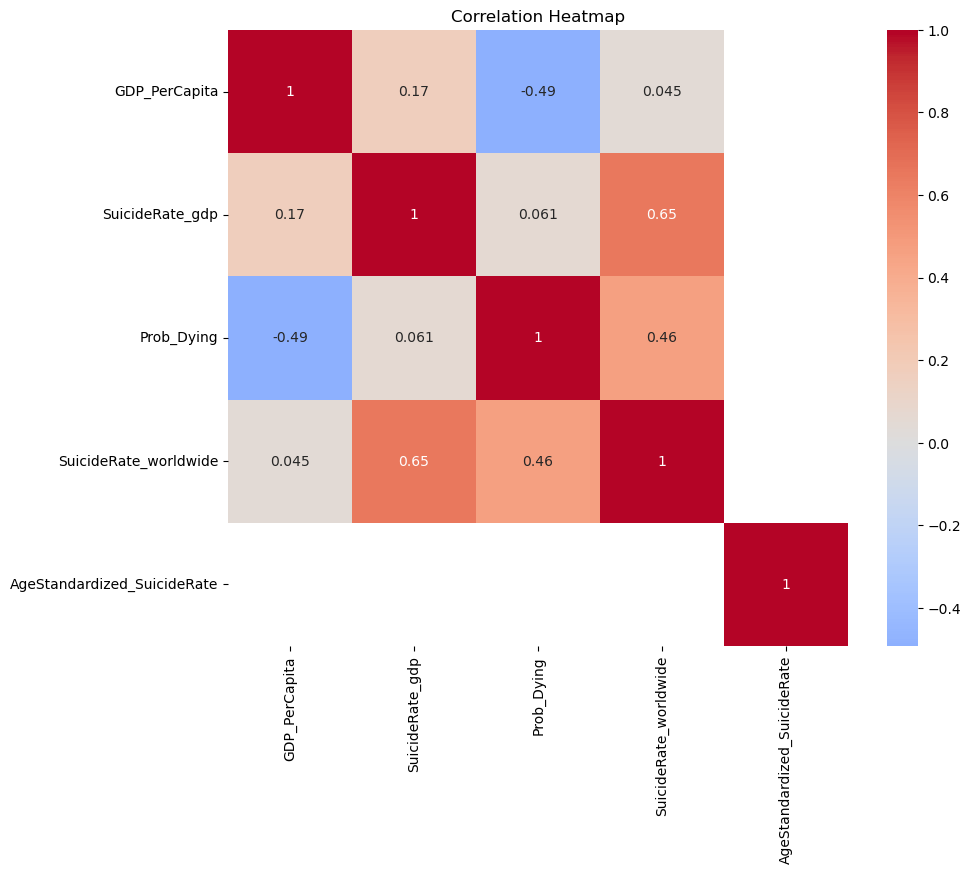

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.drop(columns=['Unnamed: 0', 'Country', 'CountryCode', 'Year', 'Sex']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [3]:

corr_unstacked = corr.abs().unstack()
sorted_pairs = corr_unstacked.sort_values(kind="quicksort", ascending=False)

high_corr_pairs = sorted_pairs[sorted_pairs < 1].head(6)

high_corr_pairs


SuicideRate_gdp        SuicideRate_worldwide    0.649625
SuicideRate_worldwide  SuicideRate_gdp          0.649625
GDP_PerCapita          Prob_Dying               0.492527
Prob_Dying             GDP_PerCapita            0.492527
                       SuicideRate_worldwide    0.463492
SuicideRate_worldwide  Prob_Dying               0.463492
dtype: float64

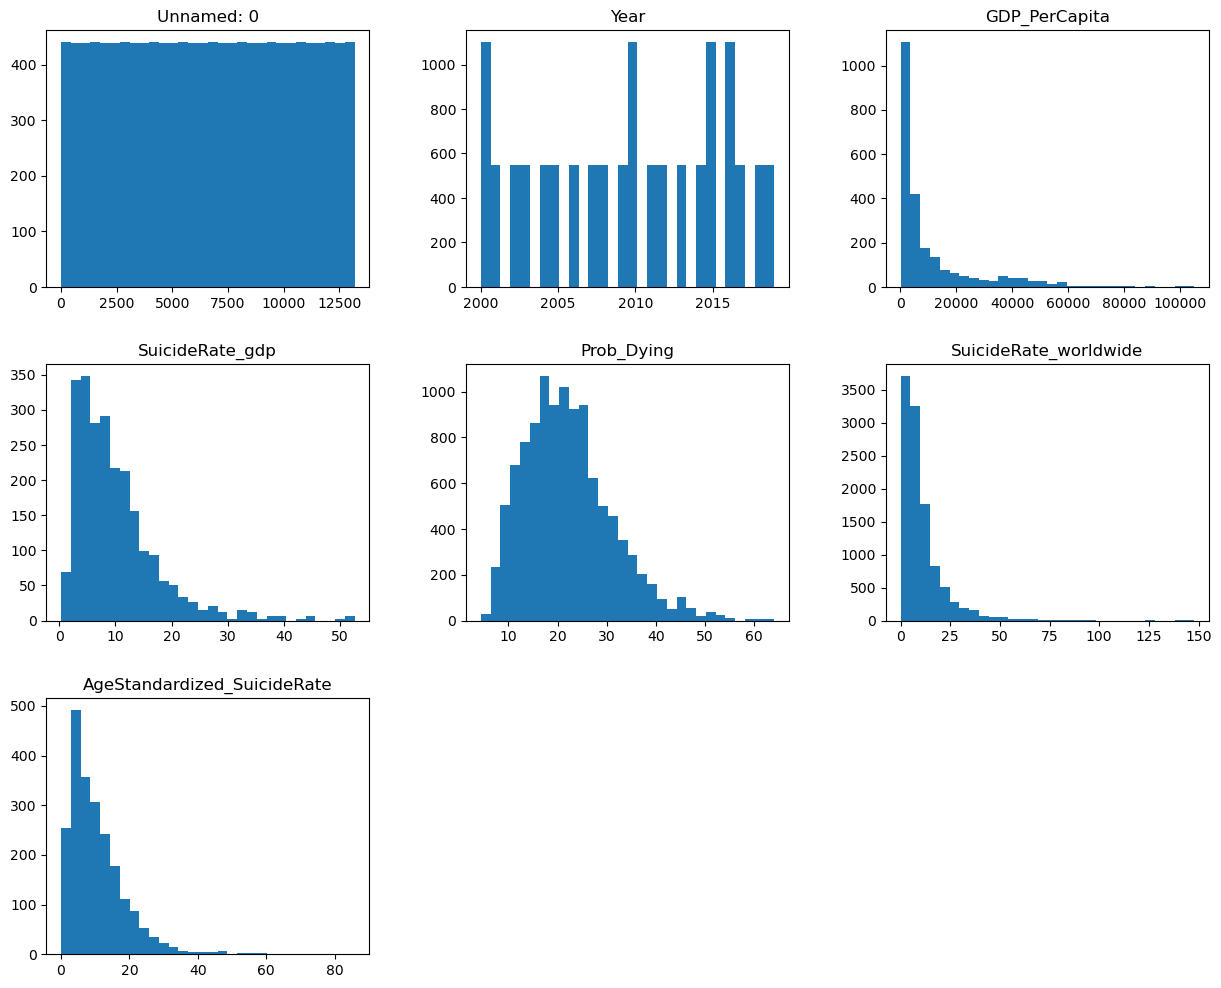

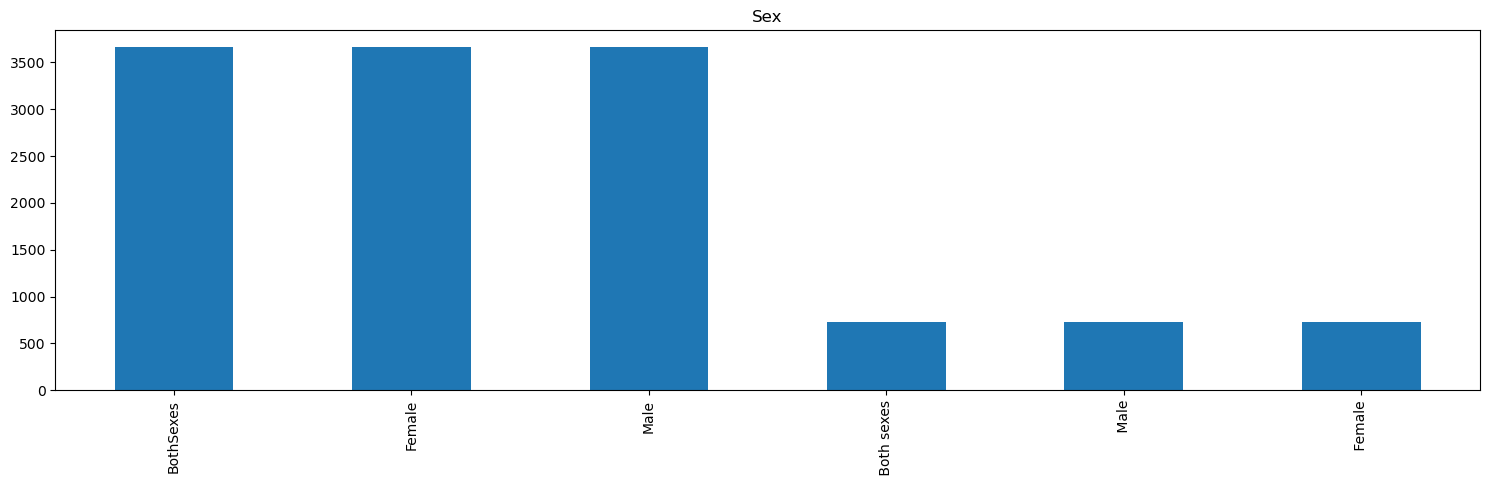

Unnamed: 0                         0
Country                            0
CountryCode                    10791
Year                               0
GDP_PerCapita                  10791
SuicideRate_gdp                10791
Sex                                5
Prob_Dying                      2201
SuicideRate_worldwide           2201
AgeStandardized_SuicideRate    10985
dtype: int64

In [10]:
#6.1
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_distributions = data[numerical_features].hist(figsize=(15, 12), bins=30, grid=False)

categorical_features = data.select_dtypes(include=['object']).drop(columns=['Country', 'CountryCode']).columns.tolist()

plt.figure(figsize=(15, 5))
for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), idx)
    data[feature].value_counts().plot(kind='bar', title=feature)

plt.tight_layout()
plt.show()

missing_values = data.isnull().sum()

missing_values


In [1]:
import pandas as pd

# Load the data
data_path = 'final_merged_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,Country,CountryCode,Year,GDP_PerCapita,SuicideRate_gdp,Sex,Prob_Dying,SuicideRate_worldwide,AgeStandardized_SuicideRate
0,0,Afghanistan,AFG,2000,556.836318,5.7,BothSexes,41.7,4.9,NaN
1,1,Afghanistan,AFG,2000,556.836318,5.7,Female,39.4,4.8,NaN
2,2,Afghanistan,AFG,2000,556.836318,5.7,Male,43.9,5.0,NaN
3,3,Afghanistan,AFG,2005,242.031379,6.3,BothSexes,40.9,5.0,NaN
4,4,Afghanistan,AFG,2005,242.031379,6.3,Female,40.0,4.5,NaN


In [11]:
#6.1
from sklearn.impute import KNNImputer

numerical_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0'])

imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(numerical_data)

data[numerical_data.columns] = data_imputed

missing_after_imputation = data.isnull().sum()

missing_after_imputation


Unnamed: 0                         0
Country                            0
CountryCode                    10791
Year                               0
GDP_PerCapita                      0
SuicideRate_gdp                    0
Sex                                5
Prob_Dying                         0
SuicideRate_worldwide              0
AgeStandardized_SuicideRate        0
dtype: int64

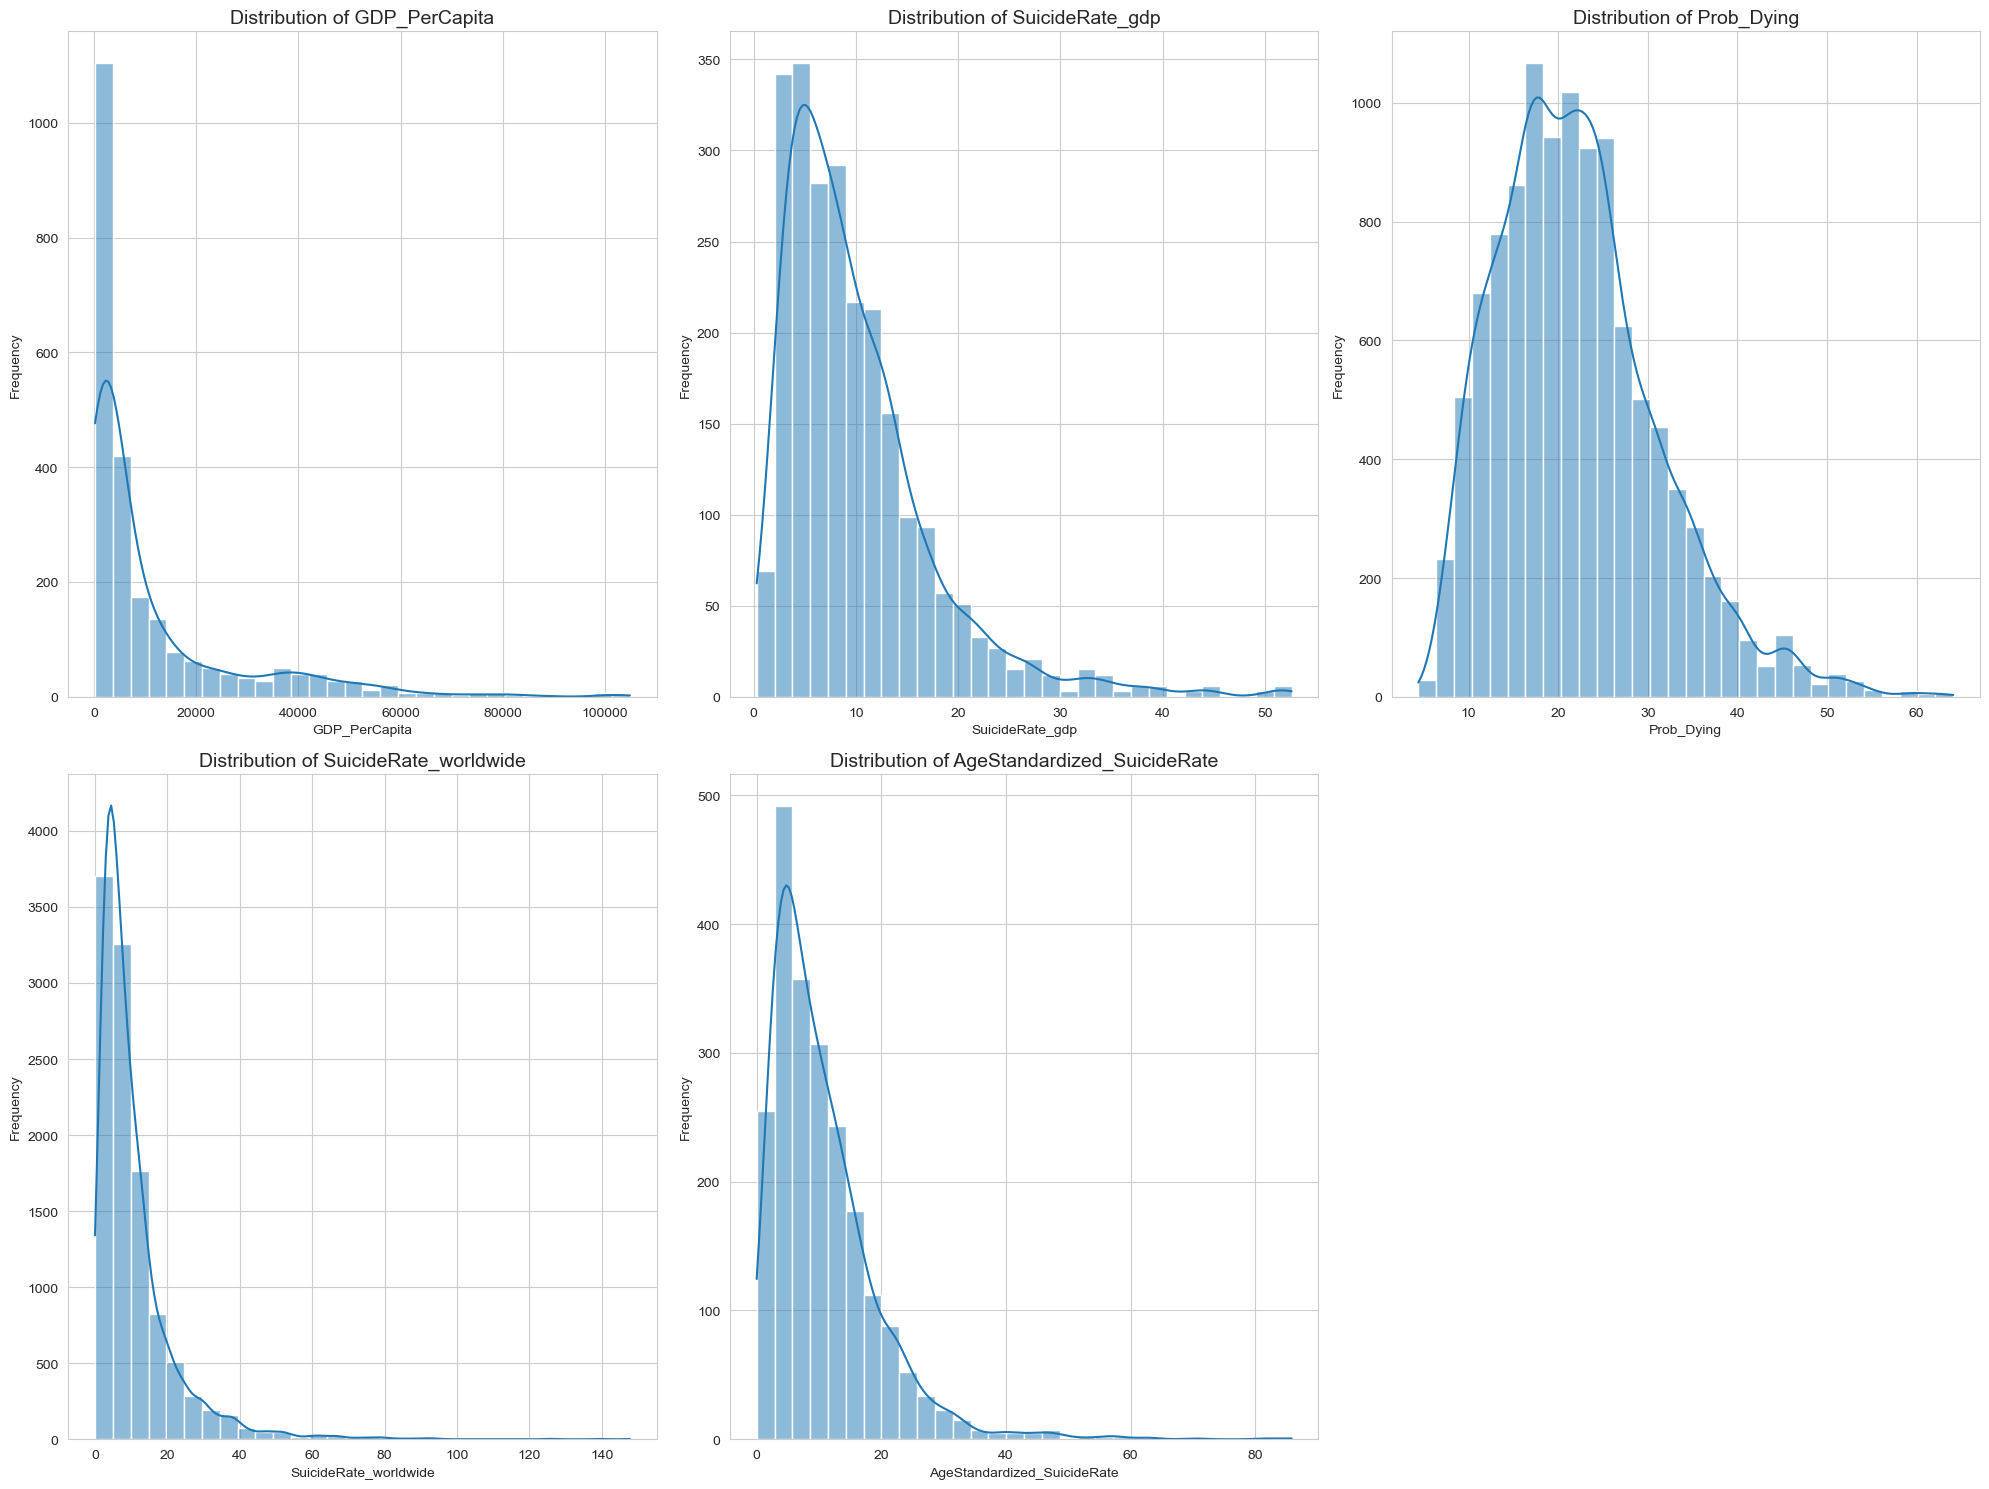

In [4]:
#6.1
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(20, 15))

columns_to_visualize = ['GDP_PerCapita', 'SuicideRate_gdp', 'Prob_Dying', 'SuicideRate_worldwide', 'AgeStandardized_SuicideRate']

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

In [14]:
# 6.3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features].drop(columns='Year'))

pca = PCA(n_components=0.95) 
data_pca = pca.fit_transform(scaled_data)

num_components = pca.n_components_

num_components


5

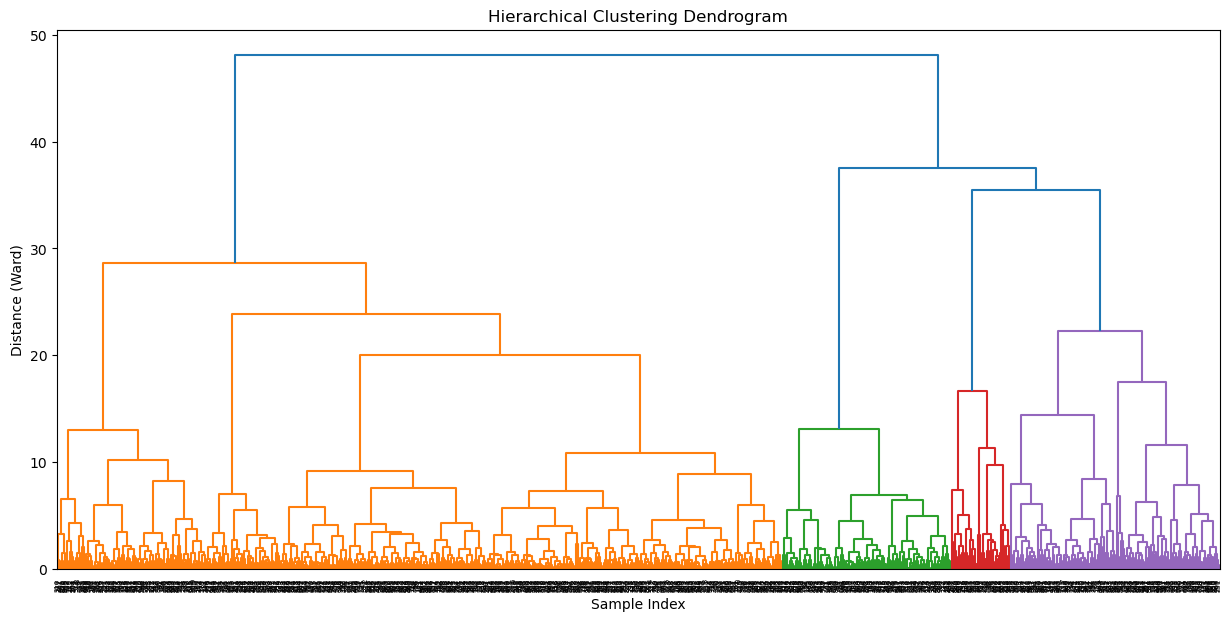

In [15]:
# 6.3 
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Due to potential computational intensity, we'll use a subset of the data for the dendrogram
sample_indices = np.random.choice(data_pca_filled.shape[0], 1000, replace=False)
data_subset = data_pca_filled[sample_indices]

# Compute the linkage matrix
Z = linkage(data_subset, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.show()


In [16]:
# 6.3
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering and assign data points to 9 clusters
labels = fcluster(Z, t=9, criterion='maxclust')

# Adding the cluster labels to our data subset
data_subset_clustered = data.iloc[sample_indices].copy()
data_subset_clustered['Cluster'] = labels

# Display the distribution of data points in each cluster
cluster_distribution = data_subset_clustered['Cluster'].value_counts().sort_index()

cluster_distribution


1    128
2     64
3    177
4    255
5    145
6     51
7     91
8      7
9     82
Name: Cluster, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data_filled.drop(columns=['SuicideRate_worldwide', 'Country', 'CountryCode', 'Sex'])
y = data_filled['SuicideRate_worldwide']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((10544, 6), (2637, 6))

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Training with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluating the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)

rf_mse


8.592576605066359

In [23]:
# Training with Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluating the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_predictions)

gb_mse


14.476410258653491

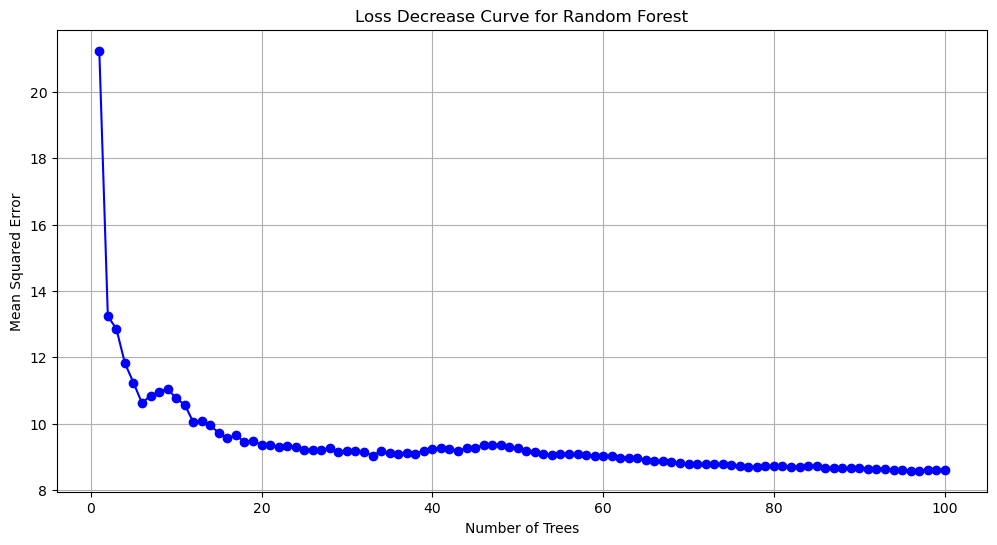

In [26]:
# Simulating a "loss decrease curve" for Random Forest by incrementally increasing the number of trees

n_estimators_range = list(range(1, 101))  # We will test from 1 to 100 trees
mse_scores = []

for n_trees in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_trees, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Plotting the "loss decrease curve"
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, mse_scores, '-o', color='blue')
plt.title('Loss Decrease Curve for Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


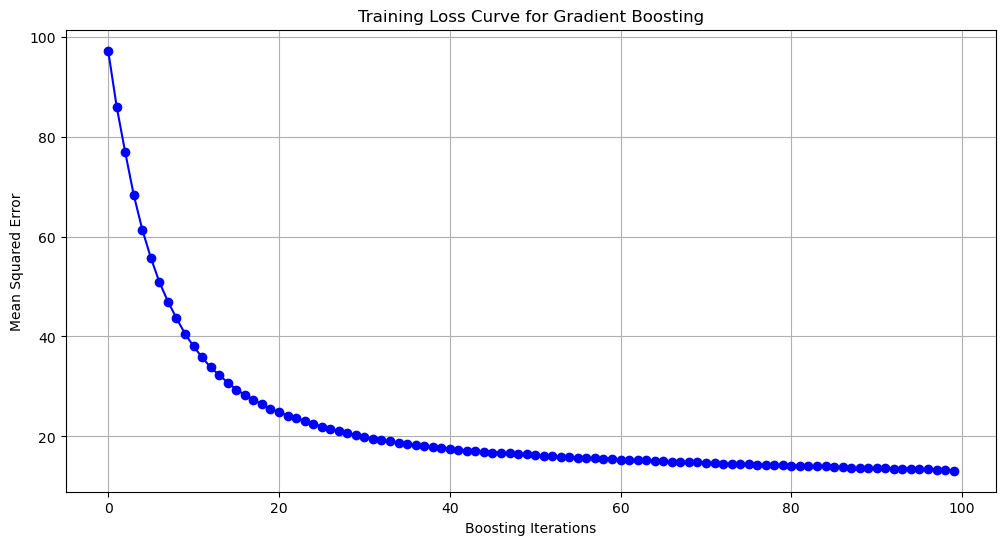

In [25]:
# Training Gradient Boosting Regressor and collecting training loss
gb_model_with_loss = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
gb_model_with_loss.fit(X_train, y_train)

# Extracting training loss
train_loss = gb_model_with_loss.train_score_

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, '-o', color='blue')
plt.title('Training Loss Curve for Gradient Boosting')
plt.xlabel('Boosting Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_df6d677ff43e, depth=5, numNodes=19, numClasses=567, numFeatures=5
  If (feature 4 <= 2.216024310382098)
   If (feature 4 <= 2.2105597751160024)
    Predict: 566.0
   Else (feature 4 > 2.2105597751160024)
    If (feature 3 <= 1.6193392260821902)
     If (feature 3 <= 1.536809406105531)
      If (feature 3 <= 1.4468497739944197)
       Predict: 5.0
      Else (feature 3 > 1.4468497739944197)
       Predict: 0.0
     Else (feature 3 > 1.536809406105531)
      If (feature 1 <= 2.365548871292941)
       Predict: 1.0
      Else (feature 1 > 2.365548871292941)
       Predict: 6.0
    Else (feature 3 > 1.6193392260821902)
     If (feature 3 <= 1.7664051342320237)
      If (feature 3 <= 1.695573522904327)
       Predict: 7.0
      Else (feature 3 > 1.695573522904327)
       Predict: 2.0
     Else (feature 3 > 1.7664051342320237)
      If (feature 3 <= 1.9242220118926374)
       Predict: 9.0
      Else (feature 3 > 1.9242220118926374)
 

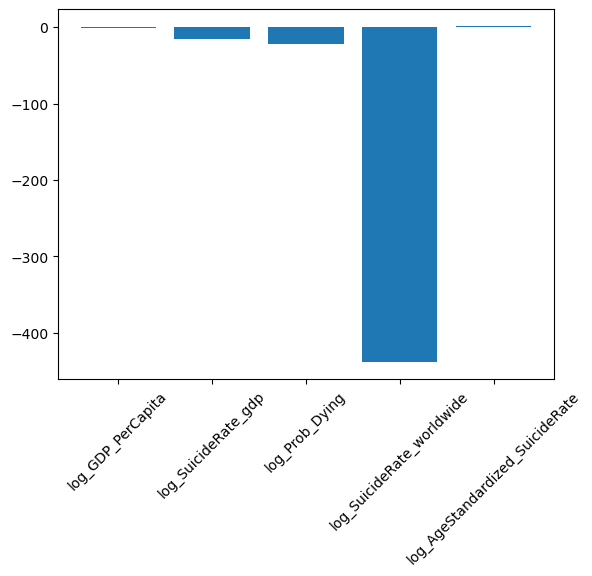

In [5]:
#决策树和逻辑回归
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression
from pyspark.ml import Pipeline
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# 1. 创建Spark会话
spark = SparkSession.builder.appName("Suicide Rate Prediction").getOrCreate()

# 2. 加载数据
data_path = "final_merged_data.csv"
data = spark.read.csv(data_path, header=True, inferSchema=True)

# 3. 数据预处理
# 计算log值
log_columns = ["GDP_PerCapita", "SuicideRate_gdp", "Prob_Dying", "SuicideRate_worldwide", "AgeStandardized_SuicideRate"]
for col in log_columns:
    data = data.withColumn(f"log_{col}", F.log(F.col(col) + 1))

# 处理 null 值
mean_vals = data.agg(*[(F.mean(c)).alias(c) for c in data.columns if 'log_' in c]).collect()[0]
mean_dict = mean_vals.asDict()
data = data.na.fill(mean_dict)

# 4. 为目标变量创建索引
indexer = StringIndexer(inputCol="SuicideRate_worldwide", outputCol="label", handleInvalid="keep")

# 5. 使用 VectorAssembler 转换特征
feature_columns = ["log_GDP_PerCapita", "log_SuicideRate_gdp", "log_Prob_Dying", "log_SuicideRate_worldwide", "log_AgeStandardized_SuicideRate"]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# 6. 划分数据集
training_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# 7. Decision Tree 模型训练
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
pipeline_dt = Pipeline(stages=[indexer, vector_assembler, dt])
model_dt = pipeline_dt.fit(training_data)

# 8. Logistic Regression Modeling
lr = LogisticRegression(labelCol="label", featuresCol="features")
pipeline_lr = Pipeline(stages=[indexer, vector_assembler, lr])
model_lr = pipeline_lr.fit(training_data)

# 9. Visualization
# For Decision Tree
print(model_dt.stages[-1].toDebugString)

# For Logistic Regression
coeff_matrix = model_lr.stages[-1].coefficientMatrix.toArray()
importance = coeff_matrix[0, :]
plt.bar(feature_columns, importance)
plt.xticks(rotation=45)
plt.show()


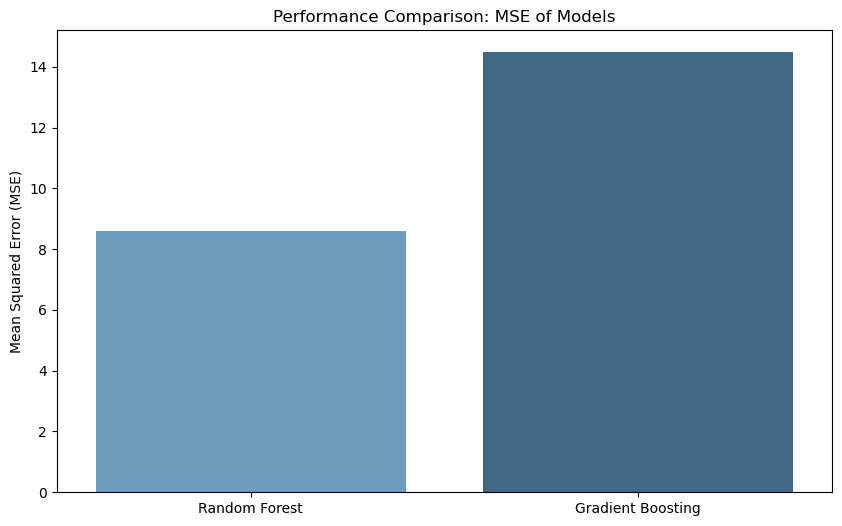

In [24]:
# Re-plotting the MSE for both models
plt.figure(figsize=(10, 6))
mse_values = [rf_mse, gb_mse]
models = ['Random Forest', 'Gradient Boosting']

sns.barplot(x=models, y=mse_values, palette="Blues_d")
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performance Comparison: MSE of Models')
plt.show()

In [2]:
data = data.drop(columns=['Unnamed: 0'])

missing_values_info = data.isnull().sum()

data_info = data.info()
data_description = data.describe(include='all')

missing_values_info, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13181 entries, 0 to 13180
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      13181 non-null  object 
 1   CountryCode                  2390 non-null   object 
 2   Year                         13181 non-null  int64  
 3   GDP_PerCapita                2390 non-null   float64
 4   SuicideRate_gdp              2390 non-null   float64
 5   Sex                          13176 non-null  object 
 6   Prob_Dying                   10980 non-null  float64
 7   SuicideRate_worldwide        10980 non-null  float64
 8   AgeStandardized_SuicideRate  2196 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 926.9+ KB


(Country                            0
 CountryCode                    10791
 Year                               0
 GDP_PerCapita                  10791
 SuicideRate_gdp                10791
 Sex                                5
 Prob_Dying                      2201
 SuicideRate_worldwide           2201
 AgeStandardized_SuicideRate    10985
 dtype: int64,
 None,
             Country CountryCode          Year  GDP_PerCapita  SuicideRate_gdp  \
 count         13181        2390  13181.000000    2390.000000      2390.000000   
 unique          185         160           NaN            NaN              NaN   
 top     Afghanistan         AFG           NaN            NaN              NaN   
 freq             72          15           NaN            NaN              NaN   
 mean            NaN         NaN   2009.624839   11163.108722        10.012636   
 std             NaN         NaN      5.872635   16521.122510         7.485555   
 min             NaN         NaN   2000.000000     124.460800 

In [10]:
import pandas as pd

data_path = 'final_merged_data.csv'
data = pd.read_csv(data_path)

data.head()


,Unnamed: 0,Country,CountryCode,Year,GDP_PerCapita,SuicideRate_gdp,Sex,Prob_Dying,SuicideRate_worldwide,AgeStandardized_SuicideRate
0,0,Afghanistan,AFG,2000,556.836318,5.7,BothSexes,41.7,4.9,NaN
1,1,Afghanistan,AFG,2000,556.836318,5.7,Female,39.4,4.8,NaN
2,2,Afghanistan,AFG,2000,556.836318,5.7,Male,43.9,5.0,NaN
3,3,Afghanistan,AFG,2005,242.031379,6.3,BothSexes,40.9,5.0,NaN
4,4,Afghanistan,AFG,2005,242.031379,6.3,Female,40.0,4.5,NaN


In [11]:
data = data.drop(columns=['Unnamed: 0'])

missing_values_info = data.isnull().sum()

data_info = data.info()

data_description = data.describe(include='all')

missing_values_info, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13181 entries, 0 to 13180
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      13181 non-null  object 
 1   CountryCode                  2390 non-null   object 
 2   Year                         13181 non-null  int64  
 3   GDP_PerCapita                2390 non-null   float64
 4   SuicideRate_gdp              2390 non-null   float64
 5   Sex                          13176 non-null  object 
 6   Prob_Dying                   10980 non-null  float64
 7   SuicideRate_worldwide        10980 non-null  float64
 8   AgeStandardized_SuicideRate  2196 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 926.9+ KB


(Country                            0
 CountryCode                    10791
 Year                               0
 GDP_PerCapita                  10791
 SuicideRate_gdp                10791
 Sex                                5
 Prob_Dying                      2201
 SuicideRate_worldwide           2201
 AgeStandardized_SuicideRate    10985
 dtype: int64,
 None,
             Country CountryCode          Year  GDP_PerCapita  SuicideRate_gdp  \
 count         13181        2390  13181.000000    2390.000000      2390.000000   
 unique          185         160           NaN            NaN              NaN   
 top     Afghanistan         AFG           NaN            NaN              NaN   
 freq             72          15           NaN            NaN              NaN   
 mean            NaN         NaN   2009.624839   11163.108722        10.012636   
 std             NaN         NaN      5.872635   16521.122510         7.485555   
 min             NaN         NaN   2000.000000     124.460800 

In [12]:
unique_sex_values = data['Sex'].unique()

unique_sex_values


array(['BothSexes', 'Female', 'Male', nan, ' Both sexes', ' Male',
       ' Female'], dtype=object)

In [13]:
data['Sex'] = data['Sex'].str.strip()

sex_mapping = {
    'Both sexes': 'BothSexes',
    'Female': 'Female',
    'Male': 'Male'
}
data['Sex'] = data['Sex'].replace(sex_mapping)

data['Sex'].fillna('Unknown', inplace=True)

unique_sex_values_cleaned = data['Sex'].unique()

unique_sex_values_cleaned


array(['BothSexes', 'Female', 'Male', 'Unknown'], dtype=object)

In [14]:
cleaned_data_subset = data.dropna(subset=['CountryCode', 'GDP_PerCapita', 'SuicideRate_gdp'])

cleaned_data_subset_info = cleaned_data_subset.info()

cleaned_data_subset_head = cleaned_data_subset.head()

cleaned_data_subset_info, cleaned_data_subset_head


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390 entries, 0 to 2389
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2390 non-null   object 
 1   CountryCode                  2390 non-null   object 
 2   Year                         2390 non-null   int64  
 3   GDP_PerCapita                2390 non-null   float64
 4   SuicideRate_gdp              2390 non-null   float64
 5   Sex                          2390 non-null   object 
 6   Prob_Dying                   2385 non-null   float64
 7   SuicideRate_worldwide        2385 non-null   float64
 8   AgeStandardized_SuicideRate  0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 186.7+ KB


(None,
        Country CountryCode  Year  GDP_PerCapita  SuicideRate_gdp        Sex  \
 0  Afghanistan         AFG  2000     556.836318              5.7  BothSexes   
 1  Afghanistan         AFG  2000     556.836318              5.7     Female   
 2  Afghanistan         AFG  2000     556.836318              5.7       Male   
 3  Afghanistan         AFG  2005     242.031379              6.3  BothSexes   
 4  Afghanistan         AFG  2005     242.031379              6.3     Female   
 
    Prob_Dying  SuicideRate_worldwide  AgeStandardized_SuicideRate  
 0        41.7                    4.9                          NaN  
 1        39.4                    4.8                          NaN  
 2        43.9                    5.0                          NaN  
 3        40.9                    5.0                          NaN  
 4        40.0                    4.5                          NaN  )

In [15]:
cleaned_data_subset = cleaned_data_subset.drop(columns=['AgeStandardized_SuicideRate'])

cleaned_data_subset_head = cleaned_data_subset.head()

cleaned_data_subset_head

,Country,CountryCode,Year,GDP_PerCapita,SuicideRate_gdp,Sex,Prob_Dying,SuicideRate_worldwide
0,Afghanistan,AFG,2000,556.836318,5.7,BothSexes,41.7,4.9
1,Afghanistan,AFG,2000,556.836318,5.7,Female,39.4,4.8
2,Afghanistan,AFG,2000,556.836318,5.7,Male,43.9,5.0
3,Afghanistan,AFG,2005,242.031379,6.3,BothSexes,40.9,5.0
4,Afghanistan,AFG,2005,242.031379,6.3,Female,40.0,4.5


In [16]:
cleaned_data_subset = cleaned_data_subset.dropna(subset=['Prob_Dying', 'SuicideRate_worldwide'])

cleaned_data_subset_info = cleaned_data_subset.info()

cleaned_data_subset_head = cleaned_data_subset.head()

cleaned_data_subset_info, cleaned_data_subset_head


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2389
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2385 non-null   object 
 1   CountryCode            2385 non-null   object 
 2   Year                   2385 non-null   int64  
 3   GDP_PerCapita          2385 non-null   float64
 4   SuicideRate_gdp        2385 non-null   float64
 5   Sex                    2385 non-null   object 
 6   Prob_Dying             2385 non-null   float64
 7   SuicideRate_worldwide  2385 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 167.7+ KB


(None,
        Country CountryCode  Year  GDP_PerCapita  SuicideRate_gdp        Sex  \
 0  Afghanistan         AFG  2000     556.836318              5.7  BothSexes   
 1  Afghanistan         AFG  2000     556.836318              5.7     Female   
 2  Afghanistan         AFG  2000     556.836318              5.7       Male   
 3  Afghanistan         AFG  2005     242.031379              6.3  BothSexes   
 4  Afghanistan         AFG  2005     242.031379              6.3     Female   
 
    Prob_Dying  SuicideRate_worldwide  
 0        41.7                    4.9  
 1        39.4                    4.8  
 2        43.9                    5.0  
 3        40.9                    5.0  
 4        40.0                    4.5  )

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

countrywise_avg_metrics = cleaned_data_subset.groupby('Country').agg({
    'GDP_PerCapita': 'mean',
    'SuicideRate_gdp': 'mean',
    'Prob_Dying': 'mean',
    'SuicideRate_worldwide': 'mean'
}).reset_index()

countrywise_avg_metrics.head()


,Country,GDP_PerCapita,SuicideRate_gdp,Prob_Dying,SuicideRate_worldwide
0,Afghanistan,493.573040,5.32,38.306667,4.420000
1,Albania,3194.353748,6.46,16.786667,5.926667
2,Algeria,3497.120774,3.52,15.553333,3.320000
3,Angola,2744.039006,6.10,25.206667,7.333333
4,Antigua and Barbuda,13316.284620,0.96,18.060000,0.880000


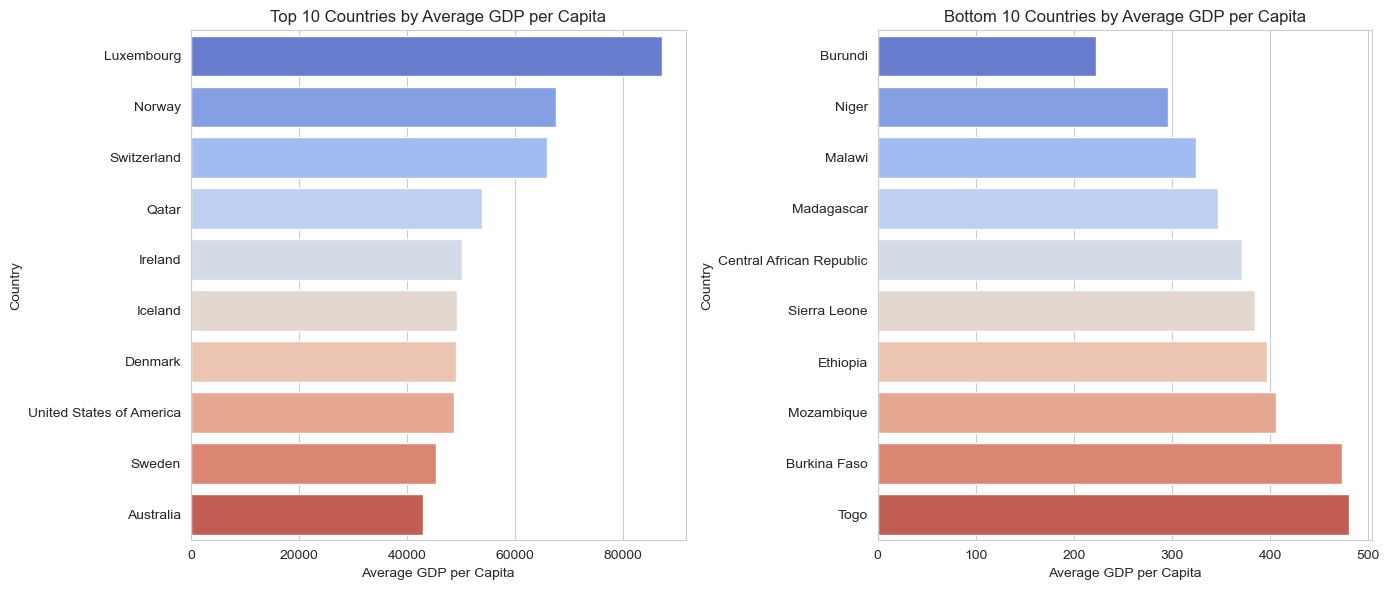

In [18]:
top_10_gdp_per_capita = countrywise_avg_metrics.sort_values(by='GDP_PerCapita', ascending=False).head(10)
bottom_10_gdp_per_capita = countrywise_avg_metrics.sort_values(by='GDP_PerCapita', ascending=True).head(10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='GDP_PerCapita', y='Country', data=top_10_gdp_per_capita, palette='coolwarm')
plt.title('Top 10 Countries by Average GDP per Capita')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='GDP_PerCapita', y='Country', data=bottom_10_gdp_per_capita, palette='coolwarm')
plt.title('Bottom 10 Countries by Average GDP per Capita')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

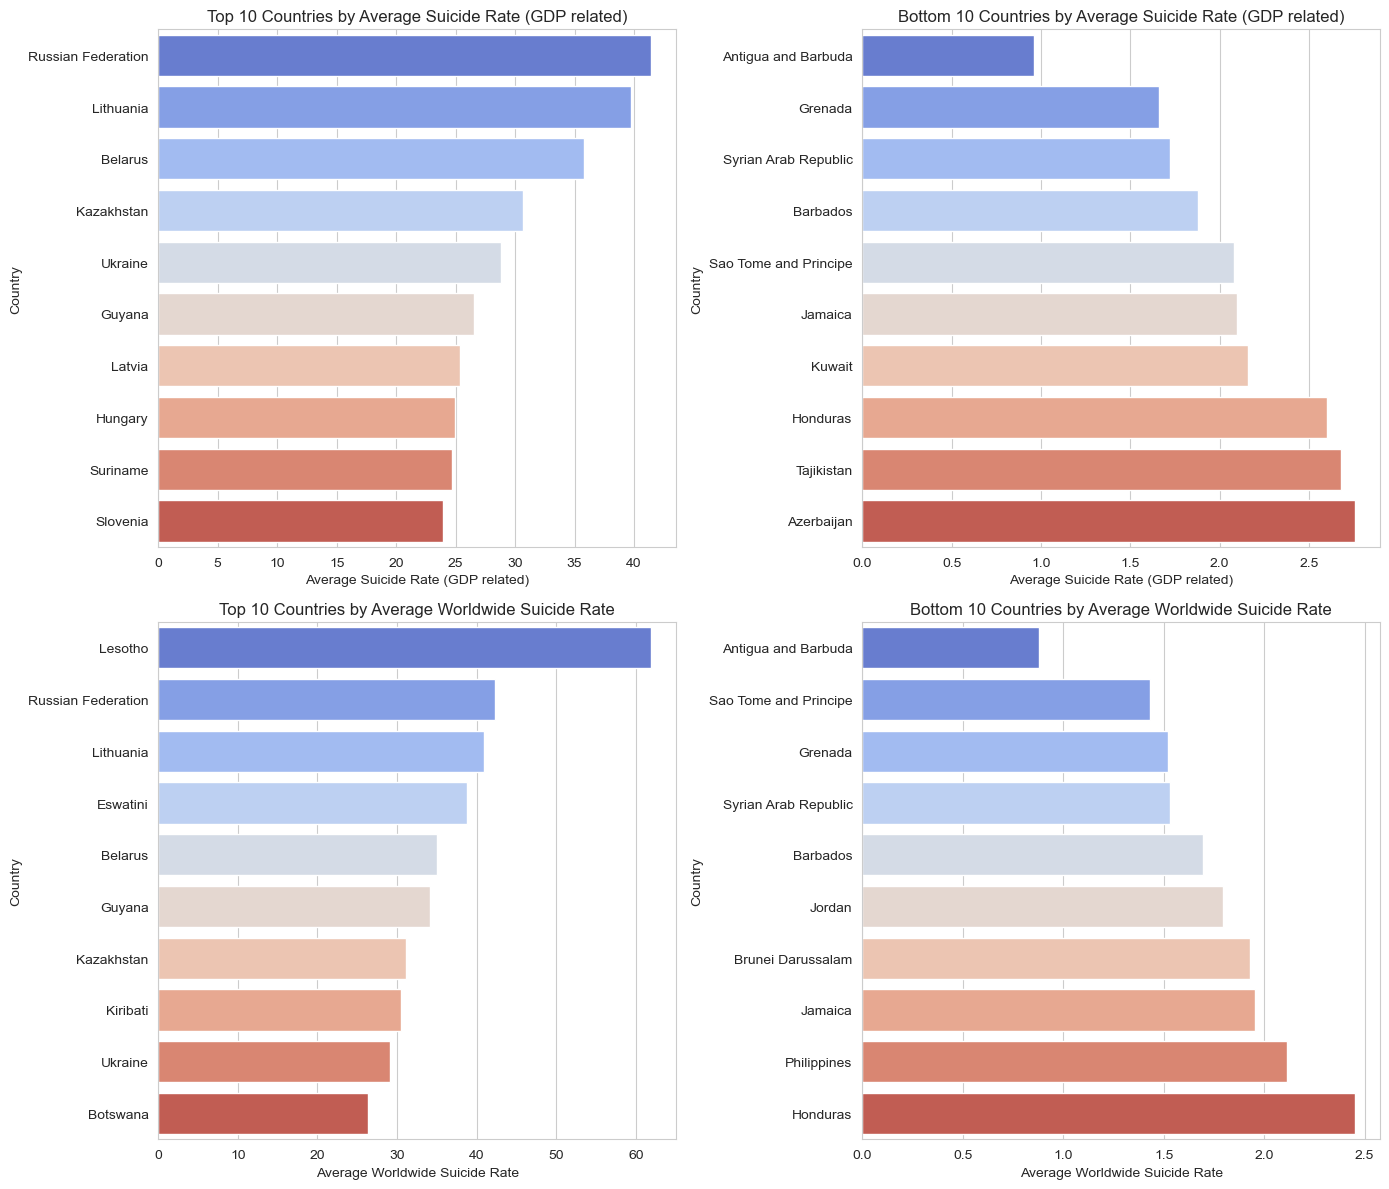

In [19]:
top_10_suicide_rate_gdp = countrywise_avg_metrics.sort_values(by='SuicideRate_gdp', ascending=False).head(10)
bottom_10_suicide_rate_gdp = countrywise_avg_metrics.sort_values(by='SuicideRate_gdp', ascending=True).head(10)

top_10_suicide_rate_worldwide = countrywise_avg_metrics.sort_values(by='SuicideRate_worldwide', ascending=False).head(10)
bottom_10_suicide_rate_worldwide = countrywise_avg_metrics.sort_values(by='SuicideRate_worldwide', ascending=True).head(10)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x='SuicideRate_gdp', y='Country', data=top_10_suicide_rate_gdp, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Countries by Average Suicide Rate (GDP related)')
axes[0, 0].set_xlabel('Average Suicide Rate (GDP related)')
axes[0, 0].set_ylabel('Country')

sns.barplot(x='SuicideRate_gdp', y='Country', data=bottom_10_suicide_rate_gdp, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Bottom 10 Countries by Average Suicide Rate (GDP related)')
axes[0, 1].set_xlabel('Average Suicide Rate (GDP related)')
axes[0, 1].set_ylabel('Country')

sns.barplot(x='SuicideRate_worldwide', y='Country', data=top_10_suicide_rate_worldwide, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Countries by Average Worldwide Suicide Rate')
axes[1, 0].set_xlabel('Average Worldwide Suicide Rate')
axes[1, 0].set_ylabel('Country')

sns.barplot(x='SuicideRate_worldwide', y='Country', data=bottom_10_suicide_rate_worldwide, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Bottom 10 Countries by Average Worldwide Suicide Rate')
axes[1, 1].set_xlabel('Average Worldwide Suicide Rate')
axes[1, 1].set_ylabel('Country')

plt.tight_layout()
plt.show()

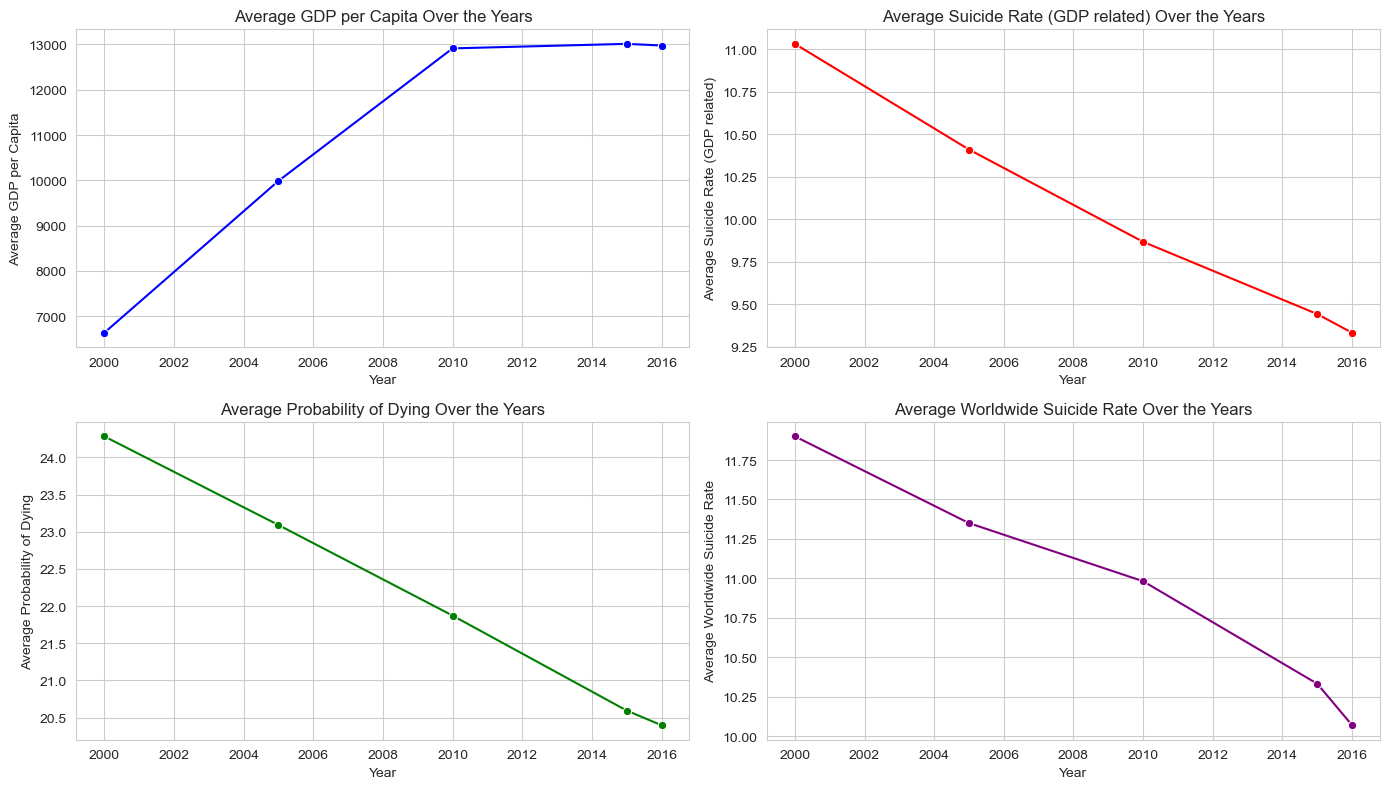

In [20]:
yearwise_avg_metrics = cleaned_data_subset.groupby('Year').agg({
    'GDP_PerCapita': 'mean',
    'SuicideRate_gdp': 'mean',
    'Prob_Dying': 'mean',
    'SuicideRate_worldwide': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.lineplot(x='Year', y='GDP_PerCapita', data=yearwise_avg_metrics, marker='o', color='b')
plt.title('Average GDP per Capita Over the Years')
plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')

plt.subplot(2, 2, 2)
sns.lineplot(x='Year', y='SuicideRate_gdp', data=yearwise_avg_metrics, marker='o', color='r')
plt.title('Average Suicide Rate (GDP related) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate (GDP related)')

plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='Prob_Dying', data=yearwise_avg_metrics, marker='o', color='g')
plt.title('Average Probability of Dying Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Probability of Dying')

plt.subplot(2, 2, 4)
sns.lineplot(x='Year', y='SuicideRate_worldwide', data=yearwise_avg_metrics, marker='o', color='purple')
plt.title('Average Worldwide Suicide Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Suicide Rate')

plt.tight_layout()
plt.show()

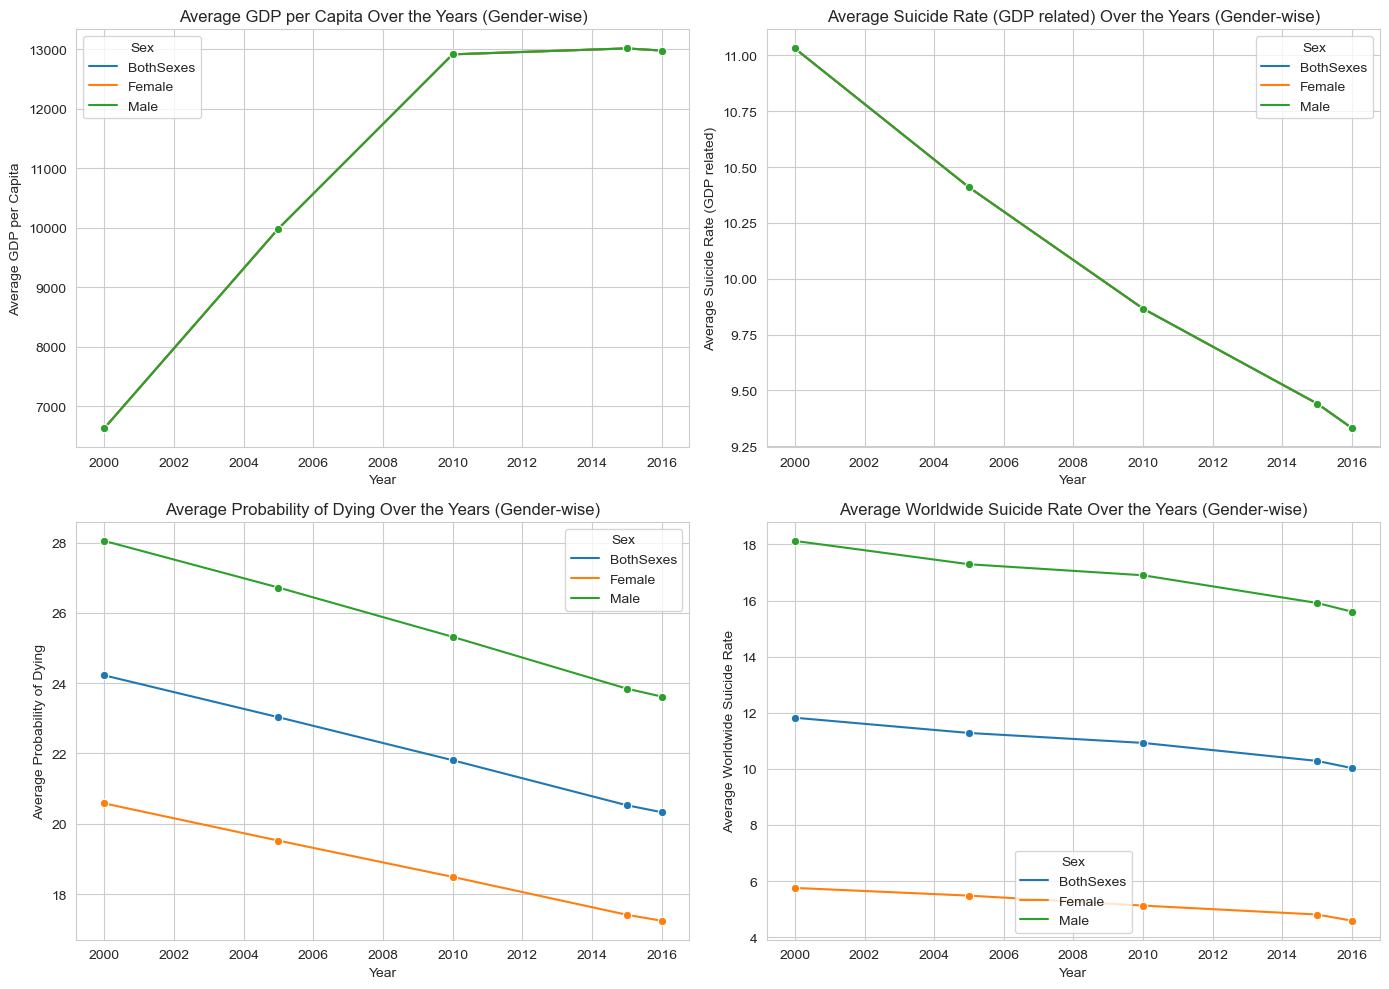

In [21]:
genderwise_avg_metrics = cleaned_data_subset.groupby(['Year', 'Sex']).agg({
    'GDP_PerCapita': 'mean',
    'SuicideRate_gdp': 'mean',
    'Prob_Dying': 'mean',
    'SuicideRate_worldwide': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(x='Year', y='GDP_PerCapita', hue='Sex', data=genderwise_avg_metrics, marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Average GDP per Capita Over the Years (Gender-wise)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average GDP per Capita')

sns.lineplot(x='Year', y='SuicideRate_gdp', hue='Sex', data=genderwise_avg_metrics, marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Average Suicide Rate (GDP related) Over the Years (Gender-wise)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Suicide Rate (GDP related)')

sns.lineplot(x='Year', y='Prob_Dying', hue='Sex', data=genderwise_avg_metrics, marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Average Probability of Dying Over the Years (Gender-wise)')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Probability of Dying')

sns.lineplot(x='Year', y='SuicideRate_worldwide', hue='Sex', data=genderwise_avg_metrics, marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Average Worldwide Suicide Rate Over the Years (Gender-wise)')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Worldwide Suicide Rate')

plt.tight_layout()
plt.show()